# Beyond the Box Office: Predicting and Understanding a Decade of Film

Sophia Liebert

sliebert@lion.lmu.edu

AIMS 4798

Dr. Mostafa Mesgari

Loyola Marymount University

Spring 2020

### Executive Summary

This report covers the study of the past decade of the American box office results. We gather distinct, informative datasets and explore that data to reveal trends. Those trends include the most common film genres and the most commercially succesful. It also includes analysis of the positive relationship between budget and gross, as well as other factors that may affect gross like the awards, critics' reviews, and rating. 

Next, we use Machine Learning techniques to predict how much a film will make at the American box office. The data is split into test and train datasets, then different models are tested and analyzed. According to the best model, we can predict a film's gross with an average error of around $30 million. It also revealed that the most important factors influencing the film's lifetime gross are the budget, average IMDb rating by women, the percentage of 10-star ratings, and the film's metascore (critics' reviews). 

### Table of Contents
1. Introduction
2. Collecting Data
3. Data Exploration
4. Machine Learning
5. Analysis of Results
6. Conclusion



---



# 1. Introduction


In this project I will try to determine what factors will make a movie successful at the US Box Office. To do so, I gathered a dataset of domestic box office results over the past decade, 2010 - 2018. The goal of this research is to see which types of movies are the most commercially successful, as well as looking at which sources of reviews/ratings are the best predictors of a movie's success. Therefore we will be able to see how important (or unimportant) critic reviews are in how a movie performs commercially. In an age where traditional indicators of a movie's supposed "quality" are increasingly seen as being out-of-touch with what audiences actually want, this study can reveal whether these traditional measures like critic reviews and award nominations are actually representative of the general moviegoing audience. Additionally, from a financial standpoint, it is extremely valuable to understand the interaction of budget, actors, and overall profit in order to make better, more lucrative decisions in filmmaking.

The film industry's success and failures are caused by a variety of factors, some of which are predictable, and some that are not. It may not be possible to exactly predict how much a film will make in the end, but by looking at some of the factors that go into the production and release of a film, we can see approximately how much they can expect to make, and whether the investment was worth it. Some of the factors to consider include the actors, director, release date, genre, and overall economic conditions.



---



# 2. Collecting Data

I have previously done projects working with box office data, and from that experience, I knew that the available public datasets on movies did not include complete box office data. As I am trying to predict box office data, this was therefore the most important piece of data and really needed to be complete and correct. I collected this data from scratch, using the website [boxofficemojo.com](https://www.boxofficemojo.com/year/2018/?grossesOption=totalGrosses). 

I started with collecting the box office results from each year of the past decade, 2010-2018. 2019 was not included as most of the other datasets I used did not include that year. The raw data from Box Office Mojo included the columns:
* Movie title
* Domestic gross
* Number of theaters
* Opening
* Year
* Studio

Of these, I kept the Title, Gross, Studio, and Year. The other columns were dropped due to a large number of missing values, and because columns like 'Opening' and Number of theaters are too correlated with the target column (Domestic Gross). Next, I dropped all films with a domestic gross of less than \$1,000,000, as the purpose of this study is to assess the factors of a mainstream film's commercial viability, and a film that grossed less than \$1,000,000 was most likely a very limited release, never expected or intended to be a mainstream commercial success. Additionally, these low-grossing films are missing a lot of other data, so dropping these helps keep the dataset clean.



In [0]:
import pandas as pd
boxoffice = pd.read_csv('boxofficemojo.csv')
boxoffice.head(10)

,rank,title,studio,lifetime_gross,year
0,1,Star Wars: Episode VII - The Force Awakens,BV,936662225,2015
1,3,Black Panther,BV,700059566,2018
2,4,Avengers: Infinity War,BV,678681680,2018
3,6,Jurassic World,Uni.,652270625,2015
4,7,The Avengers,BV,623357910,2012
5,8,Star Wars: Episode VIII - The Last Jedi,BV,620181382,2017
6,9,Incredibles 2,BV,597066966,2018
7,11,Rogue One,BV,532177324,2016
8,12,Beauty and the Beast,BV,504014165,2017
9,13,Finding Dory,BV,486295561,2016


In [0]:
boxoffice.describe().round()

,rank,lifetime_gross,year
count,1885.0,1885.0,1885.0
mean,3712.0,49097242.0,2014.0
std,2486.0,81871459.0,2.0
min,1.0,1001305.0,2010.0
25%,1405.0,3255008.0,2012.0
50%,3484.0,19019882.0,2014.0
75%,6156.0,57744720.0,2016.0
max,7729.0,936662225.0,2018.0


This data served as the base on which other data sets were joined. As data cleaning and feature engineering was a huge part of this project, the following section will describe how this was achieved.

### Finding other useful datasets

A number of different data sources were needed to create additional columns. First, I used several large datasets containing information scraped from IMDb. These datasets were found on [Kaggle](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset) and include IMDb movies, names, and ratings. They include information such as title, release date, average IMDb scores, duration, actors, and director. It also included the domestic and worldwide Gross, but there were too many missing values.

In [0]:
names = pd.read_csv('IMDb names.csv')
ratings = pd.read_csv('IMDb ratings.csv')
imdb = pd.read_csv('IMDb movies.csv')
imdb.loc[imdb.title=='The Avengers']

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
29549,tt0118661,The Avengers,The Avengers,1998,8/14/1998,"Action, Adventure, Sci-Fi",89,USA,English,Jeremiah S. Chechik,"Sydney Newman, Don MacPherson",Warner Bros.,"Ralph Fiennes, Uma Thurman, Sean Connery, Patr...",Two British Agents team up to stop Sir August ...,3.8,39405,"$60,000,000","$23,384,939","$23,384,939",12.0,461.0,118.0
49418,tt0848228,The Avengers,The Avengers,2012,4/26/2012,"Action, Adventure, Sci-Fi",143,USA,"English, Russian, Hindi",Joss Whedon,"Joss Whedon, Zak Penn",Marvel Studios,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Earth's mightiest heroes must come together an...,8.0,1206904,"$220,000,000","$623,357,910","$1,518,812,988",69.0,1859.0,738.0


Since the IMDb datasets did not have a column for rating (such as PG, PG-13, R), I found another dataset on [Kaggle](https://www.kaggle.com/ayushkalla1/rotten-tomatoes-movie-database) that did have this information, which was scraped from Rotten Tomatoes, a film review aggregator site.

In [0]:
rot = pd.read_csv('all_movies.csv')
rot.loc[rot['Title']=='The Avengers']

,Unnamed: 0,Cast 1,Cast 2,Cast 3,Cast 4,Cast 5,Cast 6,Director 1,Rating,Runtime,Title,Writer 1,Year
11175,12464,Ralph Fiennes,Uma Thurman,Sean Connery,Eileen Atkins,Eddie Izzard,Fiona Shaw,Jeremiah S. Chechik,PG-13,90 minutes,The Avengers,Don MacPherson,1998
11176,12465,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth,Scarlett Johansson,Jeremy Renner,Joss Whedon,PG-13,142 minutes,The Avengers,Joss Whedon,2012


Next, I wanted to include information about end-of-year awards, specifically the Academy Awards, which is seen as the ultimate honor in the movie industry. None of the previous datasets had this information, so I found a great [dataset](https://www.kaggle.com/iwooloowi/film-awards-imdb) with the history of every award. This was a massive dataset with more than 2 million records, as it included all types of awards from the movie and music industries. However, it was was easy to work with as it had a column of the IMDb IDs for the movie or person.

In [0]:
awards = pd.read_csv('awards.csv')
awards.head(1)

,eventId,eventName,awardName,year,occurrence,winAnnouncementTime,categoryName,nomeneeNote,name,originalName,songNames,episodeNames,characterNames,isWinner,isPrimary,isSecondary,isPerson,isTitle,isCompany,const,notes
0,ev0000263,French Syndicate of Cinema Critics,Critics Award,1992,1,NaN,Best Film,NaN,La belle noiseuse,NaN,NaN,NaN,NaN,True,True,False,False,True,False,tt0101428,NaN


### Combining datasets

The next step is to combine the columns from these various datasets. The first issue to resolve was the lack of a unique identifier. Since I am combining data from multiple data sources, there is no common unique identifier, other than the movie title. The imdb_title_id is also a useful identifier, but only the imdb and awards datasets had this.

Clearly, movie title is not necessarily consistent from dataset to dataset. Movie remakes often share the same title, for example: *The Avengers* (1998) and *The Avengers* (2012). I handled this by dropping all of the values that were from earlier than 2009, as this removed most of those duplicates/remakes. The "Awards" dataset did not have this issue, as it had a column containing imdb_title_ids or imdb_name_ids, so once I matched imdb dataset to the boxoffice dataset, I could continue to use only those unique IDs and not the movie title.

In [0]:
imdb.drop(imdb.loc[imdb.year<2009].index,inplace=True)
rot.drop(rot.loc[rot.Year<2009].index,inplace=True)

In [0]:
imdb2 = imdb.loc[:,['imdb_title_id', 'title', 'date_published',
       'genre', 'duration','country', 'language', 'description', 'avg_vote','budget','metascore','actors',
       'director','writer']]

rot2 = rot.loc[:,['Title', 'Rating', 'Runtime']]

Then, I performed left outer merges for on the imdb and rot datasets with the original boxoffice datasets, only including the columns I wanted to use from imdb and rot.

In [0]:
merge = boxoffice.merge(imdb2,how='left',on='title')
merge.info()

In [0]:
rot2.drop_duplicates(subset=('Title'),inplace=True)

In [0]:
data = merge.merge(rot2,how='left',left_on='title',right_on='Title')
data.info()

Now I have a dataframe with much more information, including cast, director, rating, runtime, and imdb vote averages. Unfortunately, since movie title is not a great unique identifier, some data was lost in between the merges, so there are now around 1500 rows instead of 1730. However, for now I just moved forward with this data.

From now on, I used the 'imdb_title_id' as the unique identifier. 

Since the 'actors' column of the dataframe (from IMDb) is a list of actor names in order of billing, I split this list into three columns representing the top three actors, as well as the top director and top writer, in the case of having more than one of each.

In [0]:
df['Actor1'] = [x.split(', ')[0] for x in df.actors]
df['Actor2'] = [x.split(', ')[1] if len(x.split(', '))>1 else 'nan' for x in df.actors]
df['Actor3'] = [x.split(', ')[2] if len(x.split(', '))>2 else 'nan' for x in df.actors]
df['director'] = [x.split(', ')[0] for x in df.director]
df['writer'] = [x.split(', ')[0] for x in df.writer]

### Getting awards nominations data

I next created a dictionary of names 'namedict' made of the 'name' and 'imdb_name_id' columns from the IMDb names dataset. This will allow me to map the actor, director, and writer names to their unique identifier (imdb_id), which can then be used to match against the complete awards dataset. 

In [0]:
names = pd.read_csv('IMDb names.csv')
names.set_index('name',inplace=True)
namedict = names.loc[:,['imdb_name_id']].to_dict().get('imdb_name_id')

df['Actor1'].replace(namedict,inplace=True)
df['Actor2'].replace(namedict,inplace=True)
df['Actor3'].replace(namedict,inplace=True)
df['director'].replace(namedict,inplace=True)
df['writer'].replace(namedict,inplace=True)

Then, I made a couple of functions that will take in the desired award (oscars, golden globes, etc), the actor/director/writer id (from IMDb), and the year of the movie in question. This way, it will get the number nominations before the movie in question was released. This is meant to be a gague of how well an actor's (or writer's/director's) public popularity corresponds to the number of awards they have. 

At first, I wanted to do this for both wins and nominations, but the two features ended up being similar and the 'win' column had very low variance, so I decided to only get the number of nominations. I also included two specific awards that represent two very different demographics- the Academy awards and the Teen Choice Awards. 

In [0]:
tc = awards.loc[awards['eventName']=='Teen Choice Awards']
aa = awards.loc[awards['eventName']=='Academy Awards, USA']
def getnoms(award1,id1,year):
  al = award1.loc[(award1['year']<=year) & (award1['const']==id1)]
  nomnum = len(al)
  return nomnum

def getwins(award1,id1,year):
  al = award1.loc[(award1['year']<=year) & (award1['const']==id1)]
  winnum = len(al.loc[al.isWinner == True])
  return winnum

Then, I applied these functions to create new features containing the sum of the nominations. Some of these features may not be significant, but those will be removed later if necessary.

In [0]:
data['num_actor_aa_noms'] = 0
data['num_actor_tc_noms'] = 0
data['num_dir_aa_noms'] = 0
data['num_writer_aa_noms'] = 0

In [0]:
for ind, row in df.iterrows():
  #id1 = df['actor1_id'][ind]
  year = row['year']
  df['num_actor_aa_noms'][ind] = (getnoms(aa,row['Actor1'],year)+getnoms(aa,row['Actor2'],year)+getnoms(aa,row['Actor3'],year))
  df['num_dir_aa_noms'][ind] = getnoms(aa,row['director'],year)
  df['num_writer_aa_noms'][ind] = getnoms(aa,row['writer'],year)
  df['num_actor_tc_noms'][ind] = (getnoms(tc,row['Actor1'],year)+getnoms(tc,row['Actor2'],year)+getnoms(tc,row['Actor3'],year))

However, I found that there was significant overlap between the Writer and Director nomination counts, as many directors also do screenplay for their films, so I dropped the 'num_writer_aa_noms' column.

In [0]:
df.drop('num_writer_aa_noms',axis=1,inplace=True)

### Getting Actor Previous Grosses

I also created a column that is a sum of the actors' previous movies from this decade - for only the movies that came out BEFORE the movie in question. This is in order to only use information that is available at the time of a movie's release, not any future data that would be impossible to obtain in reality.

The intent of this feature is to see if an actor's previous box office success is significant to their future box office success.

In [0]:
actdf = df.loc[:,['year','Actor1','Actor2','Actor3','lifetime_gross']]
## function that will sum the gross of that actor's films prior to the given film, then adds the top three actors' grosses together
data = df
data[['Actor1','Actor2','Actor3']].fillna(0,inplace=True)
def getactorgross(id,year):
  if id==0: return 0
  else:
    bdf = actdf.loc[actdf['year']<year,:]
    adf = bdf.loc[(bdf['Actor1']==id) | (bdf['Actor2']==id) | (bdf['Actor3']==id)]
    return adf.lifetime_gross.sum()

In [0]:
df['actor_gross_sum']=0

for ind, row in df.iterrows():
  year = row['year']
  df['actor_gross_sum'][ind] = (getactorgross(row['Actor1'],year)+getactorgross(row['Actor2'],year)+getactorgross(row['Actor3'],year))

### Getting IMDb user ratings

Next, in order to get more specific review data from IDMb I used the IMDb reviews dataset, which includes average rating by different demographics.

In [0]:
ratings = pd.read_csv('IMDb ratings.csv')

The original dataset had columns of the total number of each rating (1-10), so I divided that by the total number of reviews to get the percentage of votes that were 1, 5, and 10.

In [0]:
ratings['perc_10'] = ratings['votes_10'] / ratings['total_votes']
ratings['perc_1'] = ratings['votes_1'] / ratings['total_votes']
ratings['perc_5'] = ratings['votes_5'] / ratings['total_votes']

Then, I chose the columns I wanted to include in the machine learning dataset, which were intended to cover a range of demographics.

In [0]:
rate = ratings.loc[:,['imdb_title_id','allgenders_18age_avg_vote','allgenders_45age_avg_vote','males_allages_avg_vote','females_allages_avg_vote',
                   'perc_10', 'perc_1', 'perc_5']]

In [0]:
df = df.merge(rate,how='left',left_on='imdb_title_id',right_on='imdb_title_id')

### Getting economy data

Lastly, I wanted to include some other variables that I thought might help a model predict a movie's financial success, as well as getting an overall view of how the box office and economy interact. I have datasets of the national unemployment and GDP, which I then matched on the "Year" column.

In [0]:
gdp = pd.read_csv('gdp.csv')
unemp = pd.read_csv('unemploy.csv')
df = df.merge(gdp,how='left',on='year')
df = df.merge(unemp,how='left',left_on='year',right_on='Year')

### Final dataset before cleaning

In [11]:
#renaming this mostly complete df
data = df
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'rank', 'title',
       'studio', 'lifetime_gross', 'year', 'imdb_title_id', 'release_month',
       'genre', 'duration', 'country', 'language', 'description', 'avg_vote',
       'budget', 'metascore', 'Rating', 'allgenders_18age_avg_vote_x',
       'allgenders_30age_avg_vote', 'allgenders_45age_avg_vote_x',
       'males_allages_avg_vote_x', 'females_allages_avg_vote_x', 'perc_10_x',
       'perc_1_x', 'perc_5_x', 'Action', 'Drama', 'Comedy', 'Sci-Fi',
       'Romance', 'Horror', 'Sport', 'Thriller', 'Adventure', 'Crime',
       'Mystery', 'Family', 'Animation', 'Fantasy', 'director', 'writer',
       'actors', 'Actor1', 'Actor2', 'Actor3', 'num_actor_aa_noms',
       'num_actor_tc_noms', 'num_dir_aa_noms', 'actor_gross_sum', 'Year',
       'Unemployment', 'GDP'],
      dtype='object')

Clearly, many of the columns left in the dataset are not ones that I want to give the machine learning model, such as the actor names, unique ids, Title,etc. because they are categorical and/or not meaningful. 

### Cleaning missing values - Budget and Metascore & Web Scraping



Also, there are some columns that I wanted to include, such as Metascore and Budget, but these had many missing values, as they were just not complete in the original datasets I found. If I were to drop the null values from these columns, then I would be left with only around around 1200 rows, which was fewer than I would like to give the model. 

I decided to try to fill in the missing values in the Metascore and Budget columns myself, because I felt that they were very important features. Metascore is an aggregate of film critics' scores from [metacritic.com](https://www.metacritic.com/). This is a good feature to have, as the majority of the 'avg_score' from IMDb are from users, not professional film critics. I thought it would be a good comparison to have both of these values. Also, budget is clearly an important predictor of film gross, and can potentially help studios understand how their investments will or won't pay off commercially.

Instead of trying to fill in these ~400 values manually, I used the Beautiful Soup package to scrape the data from IMDb. As I have never tried webscraping, this was a great opportunity to learn and practice. The code I [wrote](https://github.com/sliebert/bs4_webscraping_imdb) scraped the Budget, Score, Metascore, Description, and Runtime from IMDb based on the 'imdb_title_id' field. Unfortunately, not all of the films in the dataset had values for Budget (since this information is not always made public), so I dropped the rows that did not. In the end, I added around 200 of the 400 rows that were missing Budget and Metascore, giving an input dataset of around 1400 rows total. Ideally, I would like to have more rows, but was not able to get this data within the time frame of this project.

## Categorical Variables

Now that I have all of these columns from outside data sources, I need to encode some of these categorical variables. The first is Genre, which is a column that is a string value with multiple genres.

In [0]:
data['genre'].fillna('none',inplace=True)
data['Action'] = [1 if 'Action' in x  else 0 for x in data.genre]
data['Drama'] = [1 if 'Drama' in x  else 0 for x in data.genre]
data['Comedy'] = [1 if 'Comedy' in x  else 0 for x in data.genre]
data['Sci-Fi'] = [1 if 'Sci-Fi' in x  else 0 for x in data.genre]
data['Romance'] = [1 if 'Romance' in x  else 0 for x in data.genre]
data['Horror'] = [1 if 'Horror' in x  else 0 for x in data.genre]
data['Sport'] = [1 if 'Sport' in x  else 0 for x in data.genre]
data['Thriller'] = [1 if 'Thriller' in x  else 0 for x in data.genre]
data['Adventure'] = [1 if 'Adventure' in x  else 0 for x in data.genre]
data['Crime'] = [1 if 'Crime' in x  else 0 for x in data.genre]
data['Mystery'] = [1 if 'Mystery' in x  else 0 for x in data.genre]
data['Family'] = [1 if 'Family' in x  else 0 for x in data.genre]
data['Animation'] = [1 if 'Animation' in x  else 0 for x in data.genre]
data['Fantasy'] = [1 if 'Fantasy' in x  else 0 for x in data.genre]

I also had to get the release month from the 'date_published' column. A small number of these were missing values, so I just filled them with the value of 6, which is in the middle.

In [0]:
data['date_published'].fillna('6/1',inplace=True)
data['release_month'] = [int(x.split('/')[0]) for x in data['date_published']]

###Label encoding

I am now encoding the remaining categorical variables of "studio" (the movie's production studio) and "rating" (G, PG, PG-13, R, NR)

In [0]:
data.loc[:,['Rating','studio']].fillna('0')

In [0]:
data['Rating'] = [str(x) for x in data['Rating']]
data['studio'] = [str(x) for x in data['studio']]

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

dataclass=[]
catcol= ['studio','Rating']
for col in catcol:
  data[col] = le.fit_transform(data[col])
  dataclass.append(le.classes_)


At this point, this stage of finding data sources, collecting datasets, and doing preliminary data cleaning is done, and I moved onto exploring the resulting dataset.

In [0]:
import pandas as pd
data = pd.read_csv('datafinal.csv')



---



# 3. Data Exploration

First let's look at the distribution of the target variable, the lifetime_gross, which is a film's gross in the United States in dollars. As mentioned earlier, the initial dataset was filtered to only include films that grossed over $1 million USD.

The lifetime gross ranges from \$1,000,000 to \$940,000,000

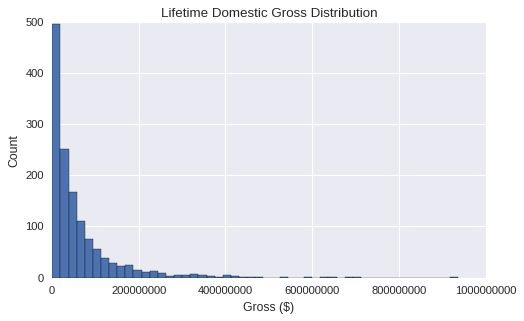

In [7]:
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.style.use('seaborn')
plt.figure(figsize=(7,4))
plt.hist(data.lifetime_gross,bins=50)
plt.ticklabel_format(style='plain')
plt.title('Lifetime Domestic Gross Distribution')
plt.xlabel('Gross ($)')
plt.ylabel('Count')
plt.xlim(0)
plt.show()

The majority of values lie on the lower end of the range, and only a few outliers gross beyond \$600 million. The most significant outlier was the one film that grossed well over \$900 million, while the rest all fell at or below \$700 million. For that reason, I dropped the top-grossing film (2015's *Star Wars Episode VII: The Force Awakens*) as it skewed the dataset so much.

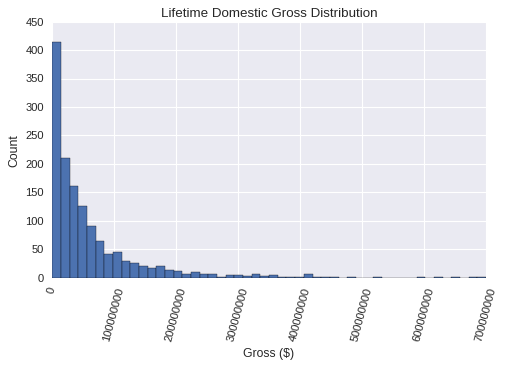

In [11]:
data.drop(0,inplace=True)
plt.figure(figsize=(7,4))
plt.hist(data.lifetime_gross,bins=50)
plt.ticklabel_format(style='plain')
plt.title('Lifetime Domestic Gross Distribution')
plt.xlabel('Gross ($)')
plt.ylabel('Count')
plt.xlim(0,700000000)
plt.xticks(rotation=75)
plt.show()

### Genre Counts

In [0]:
genresums = data.loc[:,['Action', 'Drama', 'Comedy', 'Sci-Fi',
       'Romance', 'Horror', 'Sport', 'Thriller', 'Adventure', 'Crime',
       'Mystery', 'Family', 'Animation','Fantasy']].sum()

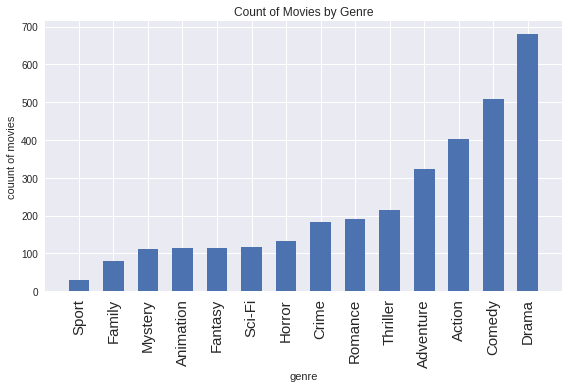

In [23]:
import matplotlib.pyplot as plt
genresums.sort_values(inplace=True)
plt.style.use('seaborn')
#plt.figure(figsize=(18,11))
plt.bar(genresums.index, genresums,width=0.6)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('genre')
plt.ylabel('couunt of movies')
plt.title('Count of Movies by Genre')
plt.tight_layout()
plt.savefig('genrecount.jpeg')
plt.show()

Unsurprisingly, the most common genres were Drama, Comedy, and Action. It is very important to mention, however, that the IMDb website displays only the first three genres, in *alphabetical order* and that films can have more than three genres. Therefore, the genres whose names are toward the beginning of the alphabet are more commonly picked up by web scraping; this includes the top four categories of Drama, Action, Comedy, and Adventure. It is highly likely that a large number of these films also were in categories like Family, but since it is further down the alphabet, that information was lost. After a quick manual overview, I observed that many of the family-oriented films only picked up the common tags like Comedy, Adventure, and even Animation. In the future, I would like to find a better way of scraping this data for *all* of a film's genres, in order to not lose important data.

### Wordclouds

Next, in order to do some text-based analysis, I created wordclouds to visualize the "description" field of the movie data.

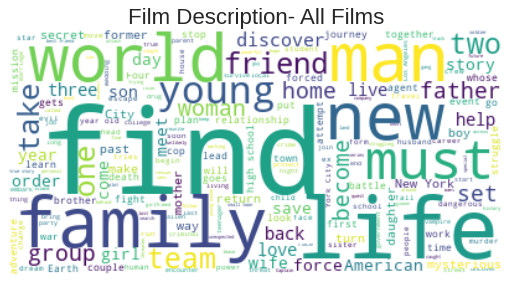

In [14]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
datadesc = data.dropna(subset=(['description']))
text = " ".join(txt for txt in datadesc.description)
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Film Description- All Films',fontsize=20)
plt.show()

Some clear trends were visible in the descriptions of all 1400 films. Common terms include things related to family, teamwork, friendship, and things related to finding oneself and saving the world. Also prominent was "young," which is commonly used in conjunction with "man" or "woman."

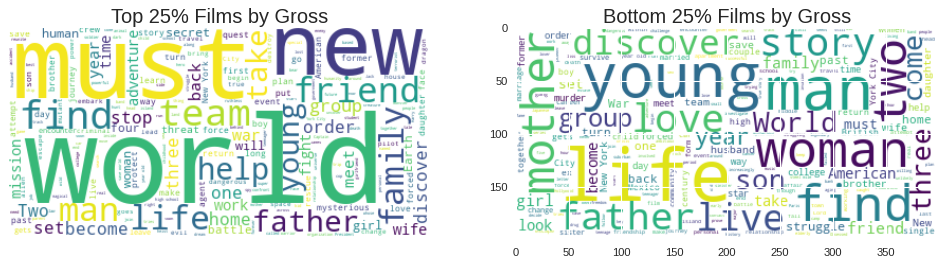

In [15]:
## separating into two datasets- top and bottom 25% of films by gross
topfilms=datadesc.loc[datadesc.lifetime_gross>=67135422]
topfilmtext = " ".join(txt for txt in topfilms.description)
bottomfilms = datadesc.loc[datadesc.lifetime_gross<6002720]
bottomfilmtext = " ".join(txt for txt in bottomfilms.description)
## plotting 2 worldclouds
plt.style.use('seaborn')
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
wordcloud = WordCloud(background_color="white").generate(topfilmtext)
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.set_title('Top 25% Films by Gross',fontsize=18)
ax1.axis('off')
wordcloud = WordCloud(background_color="white").generate(bottomfilmtext)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.set_title('Bottom 25% Films by Gross',fontsize=18)
plt.show()

Overall, the two wordclouds for the top and bottom 25% of films by gross were similar. Interestingly, the word "Man" featured in both plots, while "Woman" and "Mother" appeared *only* in the plot of the least grossing titles. It was also interesting how the word "world" was extremely prominent in the top films' word cloud, while it is much smaller in the bottom films' wordcloud. Perhaps this points to the global scope of many of the most popular flims, while the less popular focus on a smaller, local scale.

### Analysis of Budget and Gross

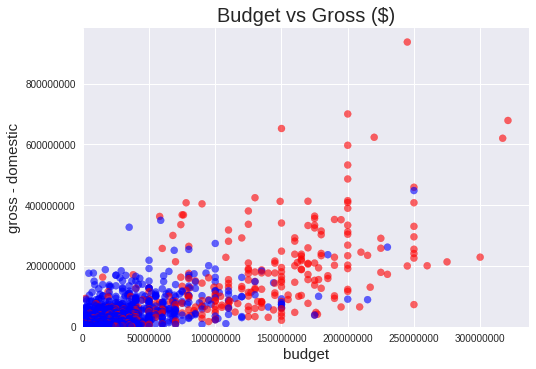

In [14]:
c=data['Adventure']
plt.scatter(data.budget,data.lifetime_gross,alpha=0.6,c=c,cmap='bwr',s=50)
plt.xlabel('budget',fontsize=15)
plt.ylabel('gross - domestic',fontsize=15)
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Budget vs Gross ($)',fontsize=20)
plt.xlim(0)
plt.ylim(0)
plt.show()

Of course, as expected there is a positive relationsip between budget and gross. Films with a higher budget also tend to be higher grossing. But budget alone fails to explain a lot of the variation in the dataset, which is why I added many other features that could influence a film's lifetime gross.

The chart was colored according to whether or not it belonged to the genre "Adventure". This demonstrates an interesting trend I observed that nearly all of the highest-budget, highest-grossing films were "Adventure" films. This trend was not noticiceable for any other genre. Clearly, 'Adventure' is seen as being the most commercially viable film genre, possibly because they are normally appealling for all demographics. Genres like Comedy or Action may focus on adults, kids, women, or men, which limits their mass-market potential. Adventure films are more likely to have universal appeal, so it makes sense that studios are willing to invest more in these films. 

### Votes / Ratings Analysis

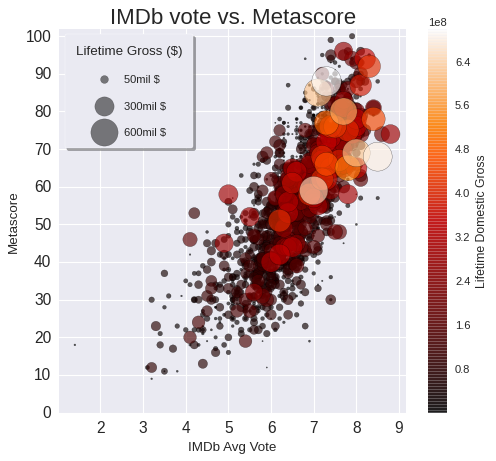

In [18]:
import numpy as np
d = data.sort_values('lifetime_gross',ascending=True)
c=d['lifetime_gross']
plt.figure(figsize=(7,6))
plt.style.use('seaborn')
plt.scatter(d.avg_vote,d.metascore,s=(d.lifetime_gross/1000000),c=c,cmap='gist_heat',alpha=0.65)
plt.yticks(range(0,101,10),fontsize=14)
plt.xticks(range(0,11),fontsize=14)
plt.ylim(0,102)
plt.xlabel('IMDb Avg Vote',fontsize=12)
plt.ylabel('Metascore',fontsize=12)
plt.colorbar().set_label('Lifetime Domestic Gross')
plt.title('IMDb vote vs. Metascore',fontsize=20)
for area in [50, 300, 600]:
    plt.scatter([], [], c='black', alpha=0.5, s=area,
                label=str(area) + 'mil $')
plt.legend(scatterpoints=1, labelspacing=1.5, title='Lifetime Gross ($)',loc='upper left',fancybox=True,framealpha=1,shadow=True, borderpad=1,frameon=True)
plt.show()

There is a strong positive correlation between the two ratings, meaning that audiences and critics are generally in agreement about the quality of these films. We observe that most of the highest-grossing films (largest circles) are also tend to receive moderate-to-good reviews from both critics and audiences. However the best-reviewed films (top right of the chart) are not always high-grossing, a result of many of them being smaller "prestige" titles not meant for mainstream success.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


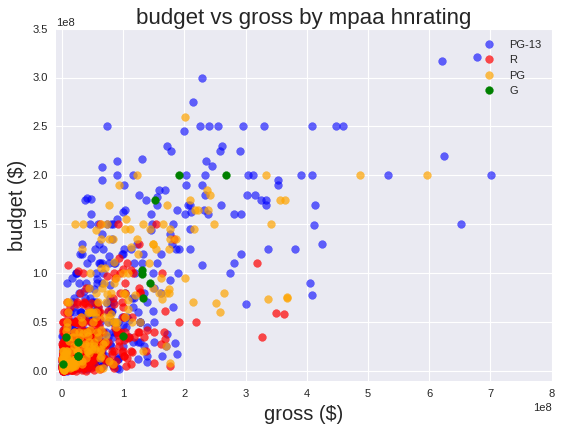

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.bar(data.Rating,data.lifetime_gross)
plt.style.use('seaborn')
plt.scatter(data.loc[data.Rating==4,'lifetime_gross'],data.loc[data.Rating==4,'budget'],color='blue',alpha=0.6,label='PG-13',s=50)
plt.scatter(data.loc[data.Rating==5,'lifetime_gross'],data.loc[data.Rating==5,'budget'],color='red',alpha=0.7,label='R',s=50)
plt.scatter(data.loc[data.Rating==3,'lifetime_gross'],data.loc[data.Rating==3,'budget'],color='orange',alpha=0.7,label='PG',s=50)
plt.scatter(data.loc[data.Rating==0,'lifetime_gross'],data.loc[data.Rating==0,'budget'],color='green',label='G',s=50)
plt.legend()
plt.xlim(-10000000)
plt.ylim(-10000000)
plt.xlabel('gross ($)',fontsize=18)
plt.ylabel('budget ($)',fontsize=18)
plt.title('budget vs gross by mpaa hnrating',fontsize=20)
plt.show()

Film production companies seem to be more likely to invest in an expensive production if it has either a PG or PG-13 rating. R-rated and G-rated films are generally lower-budget and lower-grossing. By nature, those films have more limited audiences- either small children or adults. PG-rated children's films tend to also appeal to adults (something Pixar films are known for), while G-rated films are seen as little kids-only. R-rated films clearly are restricted for anyone under age 17, and are also not appealing to families due to their subject matter.

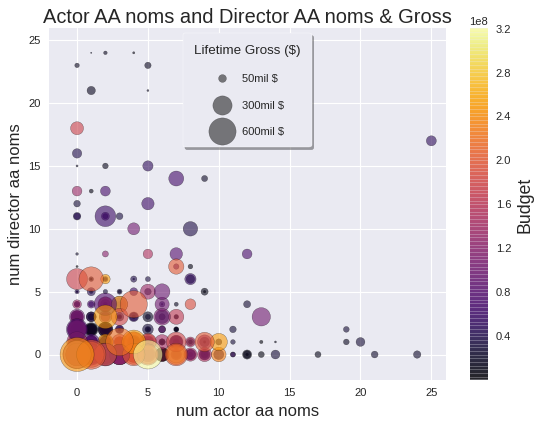

In [195]:
data = data.sort_values('lifetime_gross')
plt.scatter(data.num_actor_aa_noms,data.num_dir_aa_noms,s=data.lifetime_gross/1000000,alpha=0.6,c=data.budget,cmap='inferno')
plt.colorbar().set_label('Budget',fontsize=16)
plt.xlabel('num actor aa noms',fontsize=15)
plt.ylabel('num director aa noms',fontsize=15)
plt.title('Actor AA noms and Director AA noms & Gross',fontsize=18)
for area in [50, 300, 600]:
    plt.scatter([], [], c='black', alpha=0.5, s=area,
                label=str(area) + 'mil $')
plt.legend(scatterpoints=1, labelspacing=1.5, title='Lifetime Gross ($)',loc='upper center',fancybox=True,framealpha=1,shadow=True, borderpad=1,frameon=True)
plt.xlim(-2,26)
plt.ylim(-2,26)
plt.show()

This plot showed the relationshi between academy award nominations, budget, and gross. It was interesting to see that nearly all of the high-budget, high-grossing films are done by actors/directors with fewer Academy Award nominations, shown in the large, yellow/orange circles concentrated in the bottom left of the plot. This indicates that generally, these highly nominated actors and directors do not make "blockbuster", commercially-aimed films. 

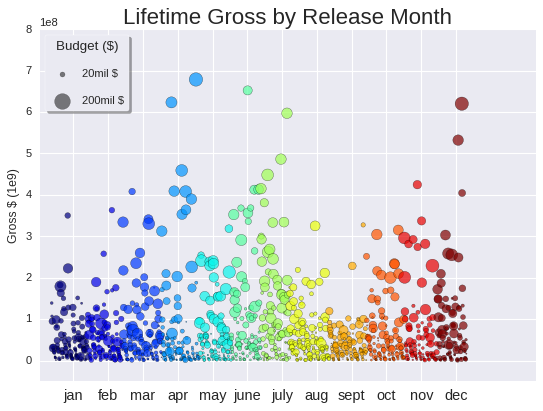

In [27]:
mon = data.sort_values(['release_month','year']).reset_index()
plt.scatter(mon.index,mon.lifetime_gross,alpha=0.7,s=mon.budget/2200000,c=mon.release_month,cmap='jet')
plt.xticks(range(72,1373,115),['jan','feb','mar','apr','may','june','july','aug','sept','oct','nov','dec'],fontsize=13)
plt.xlim(-40)
plt.ylim(-50000000)
plt.ylabel('Gross $ (1e9)')
plt.title('Lifetime Gross by Release Month',fontsize=20)
for area in [44000000/2200000, 440000000/2200000]:
    plt.scatter([], [], c='black', alpha=0.5, s=area,
                label=str(int(area)) + 'mil $')
plt.legend(scatterpoints=1, labelspacing=1.5, title='Budget ($)',loc='upper left',fancybox=True,framealpha=1,shadow=True, borderpad=0.5,frameon=True)
plt.show()

Here we see that there are some cyclical trends in terms of release month. The months of December, March, April, and May tend to have the highest-grossing movies, followed by June & July, then August, September, October, November, and January with the lowest-grossing films. This likely relates to the holidays/school year schedules. Since many families have holidays/time off in December, a lot of the highest-budget, highest-grossing films are released that month, while in August/September and January, everyone is going back to school or work. 

### Pairplots

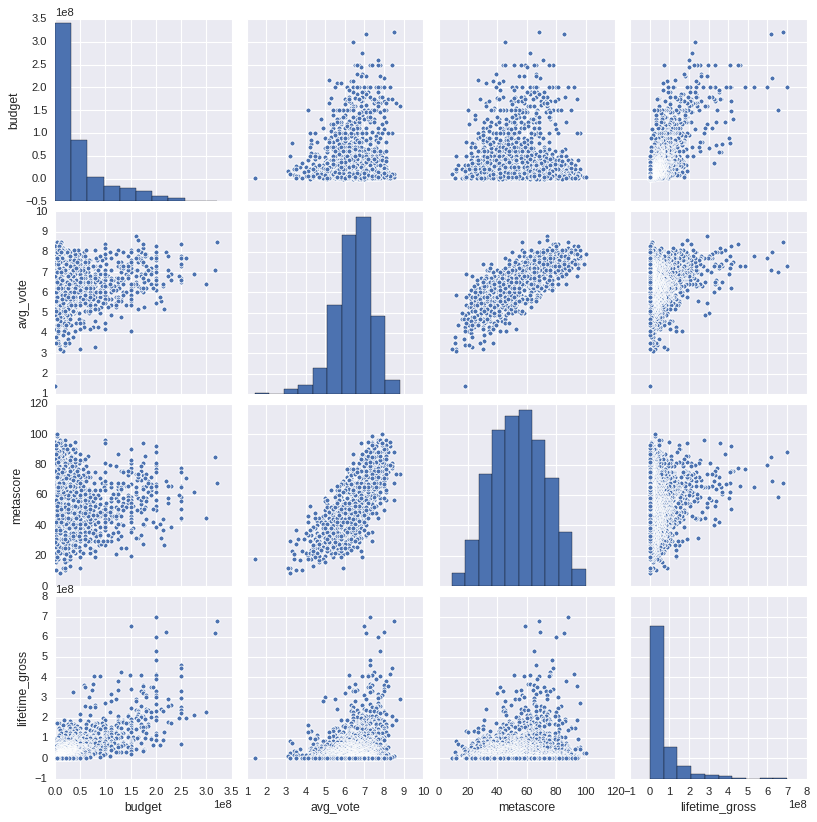

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
pairp = data.loc[:,['budget','avg_vote','metascore','lifetime_gross']]
sns.pairplot(pairp)
plt.show()

The pairplot of gross, budget, metascore, and avg vote shows very similar relationships. Higher-budget films generally have higher gross and higher ratings from critics and audiences. 

One  interesting trend I saw was that films with a higher avg_vote (the audience rating from IMDb) slightly tend to have both higher budgets and higher lifetime gross (slight positive relationship), but that that relationship is not seen clearly at all between metascore (critics' reviews) and budget and lifetime gross. This shows us that the films that do the best commercially also have higher ratings from audiences, but that films that do the best critically (metascore) do not always do well commercially.

Also, the pairplot shows that audiences in general are more generous in their reivews than crics are. The metascore is close to normal distribution, with most of the reviews falling in the middle (on a scale of 0-100), while the audience reviews were left-skewed with most of the values falling toward the upper half of the range (0-10).

### Correlation Matrix

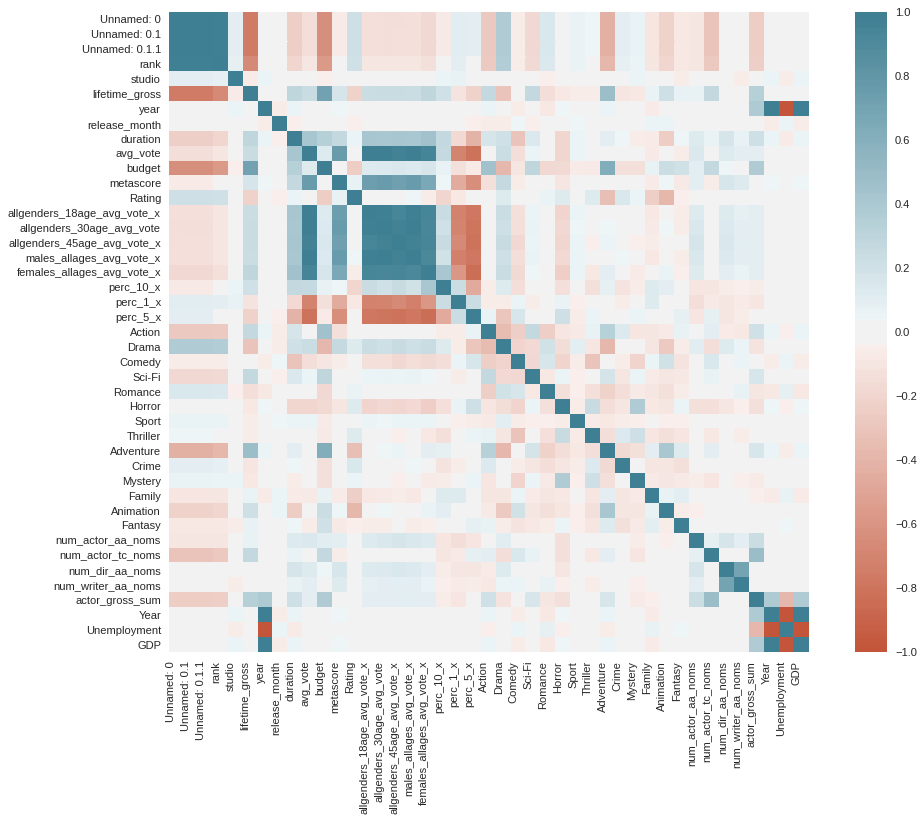

In [20]:
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(15,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')
plt.show()

As seen in the heatmap above, several of the vote average scores for different demographics do seem to be highly correlated

In [0]:
data[['females_allages_avg_vote_x','males_allages_avg_vote_x','allgenders_18age_avg_vote_x',
       'allgenders_30age_avg_vote', 'allgenders_45age_avg_vote_x']].mean()

females_allages_avg_vote_x     6.628551
males_allages_avg_vote_x       6.390896
allgenders_18age_avg_vote_x    6.566715
allgenders_30age_avg_vote      6.363438
allgenders_45age_avg_vote_x    6.391988
dtype: float64

It looks like the female and male average votes are different enough to include, but I will drop the average scores by age demographic because they are very similar. 

In [0]:
data.drop(['allgenders_18age_avg_vote_x', 'allgenders_30age_avg_vote', 'allgenders_45age_avg_vote_x'],axis=1,inplace=True)

Instead of using release month, I added columns for quarters of the year.

In [0]:
## creating cols for season instead of month
data['q1'] = [1 if x<4 else 0 for x in data['release_month']]
data['q2'] = [1 if (x>=4) & (x<7) else 0 for x in data['release_month']]
data['q3'] = [1 if (x>=7) & (x<10) else 0 for x in data['release_month']]
data['q4'] = [1 if (x>=10) & (x<13) else 0 for x in data['release_month']]

In [0]:
data.to_csv('datafinal.csv')



---



# 4. Machine Learning



In [26]:
import pandas as pd
data = pd.read_csv('datafinal.csv')
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'rank', 'title', 'studio', 'lifetime_gross', 'year', 'imdb_title_id',
       'release_month', 'genre', 'duration', 'country', 'language',
       'description', 'avg_vote', 'budget', 'metascore', 'Rating',
       'males_allages_avg_vote_x', 'females_allages_avg_vote_x', 'perc_10_x',
       'perc_1_x', 'perc_5_x', 'Action', 'Drama', 'Comedy', 'Sci-Fi',
       'Romance', 'Horror', 'Sport', 'Thriller', 'Adventure', 'Crime',
       'Mystery', 'Family', 'Animation', 'Fantasy', 'director', 'writer',
       'actors', 'Actor1', 'Actor2', 'Actor3', 'num_actor_aa_noms',
       'num_actor_tc_noms', 'num_dir_aa_noms', 'num_writer_aa_noms',
       'actor_gross_sum', 'Year', 'Unemployment', 'GDP', 'q1', 'q2', 'q3',
       'q4'],
      dtype='object')

In [0]:
cols = ['lifetime_gross','q1','q2','q3','q4',
       'duration', 'avg_vote', 'budget', 'metascore', 'Rating', 'females_allages_avg_vote_x','males_allages_avg_vote_x', 'perc_10_x',
       'perc_1_x', 'perc_5_x', 'Action', 'Drama', 'Comedy', 'Sci-Fi',
       'Romance', 'Horror', 'Sport', 'Thriller', 'Adventure', 'Crime',
       'Mystery', 'Family', 'Animation', 'Fantasy', 'num_actor_aa_noms',
       'num_actor_tc_noms', 'num_dir_aa_noms',
       'actor_gross_sum', 'Unemployment', 'GDP']
ml = data.loc[:,cols]
ml.dropna(inplace=True)
y = ml['lifetime_gross'] 
X = ml.drop(['lifetime_gross'],axis=1)

#### Functions
First I defined some functions to help with evaluating the models

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def getresults(y_preds):
  print('Mean Absolute Error:', mean_absolute_error(y_test, y_preds))  
  print('Mean Squared Error:', mean_squared_error(y_test, y_preds))  
  print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_preds)))
  
def getr2 (y_preds,model):
  print('R2 score - train:', r2_score(y_train,model.predict(X_train_scaled)))
  print('R2 score - test:', r2_score(y_test,y_preds))

def showplot(y_preds):
  df= pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})
  plt.style.use('seaborn')
  plt.scatter(df.index,df.Actual,color='blue',label='real')
  plt.scatter(df.index,df.Predicted,color='red',label='predicted')
  plt.title('predicted vs actual - test set')
  plt.legend()
  plt.show()

The metrics I will use to evaluate the models include the R-Squared value, which measures the amount of variation explained by the model, the Mean Absolute Error, which is the average magnitude of errors- or the difference between predicted and average values without considering the direction of the error, and the root mean squared error, which also measures magnitude of the error but gives higher weight to larger errors. In the case of predicting the box office grosses, we want to punish larger errors more, as getting the prediction wrong by a large amount can severely affect the usefulness of the prediction, as well as leading to making poor financial decisions.

### Splitting and Standardization

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 1) 

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

### Linear Regression
R2 Train : 0.621

R2 Test : 0.536

RMSE : 54,338,321

Mean Absolute Error: 37132923.224170126
Mean Squared Error: 2952653166158599.5
Root Mean Squared Error: 54338321.341007575
R2 score - train: 0.6214903095342807
R2 score - test: 0.5363488479166827


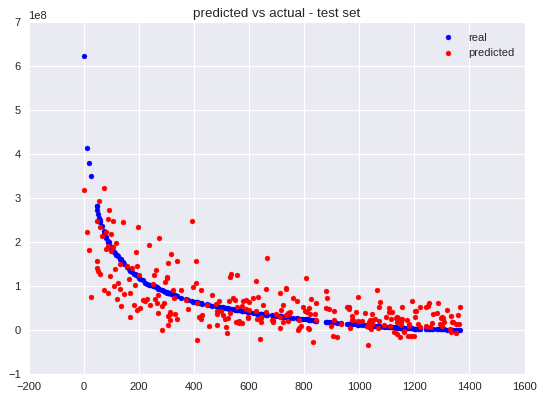

In [64]:
from sklearn.linear_model import LinearRegression
plt.style.use('classic')
lr = LinearRegression()  
lr.fit(X_train_scaled, y_train) #training the algorithm
y_pred_lr = lr.predict(X_test_scaled)
getresults(y_pred_lr)
getr2(y_pred_lr,lr)
showplot(y_pred_lr)

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

cv = cross_validate(lr, X, y, cv=4, scoring='neg_mean_absolute_error')
print(cv['test_score'])
print(cv['test_score'].mean())

[-1.22386788e+08 -3.31061443e+07 -2.79382656e+07 -3.14470452e+07]
-53719560.6854913


### Ridge regression
R2 Train : 0.621

R2 Test : 0.537

RMSE : 54,310,485

Ridge
Mean Absolute Error: 37070592.041724265
Mean Squared Error: 2949628834677076.0
Root Mean Squared Error: 54310485.49476497
R2 score - train: 0.6215373821108852
R2 score - test: 0.5368237546181408


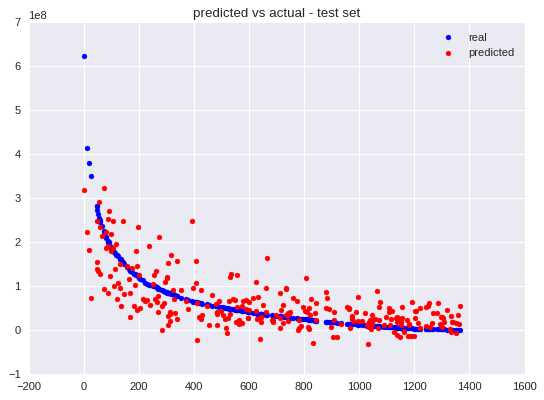

In [65]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha=0.5,random_state=123)
ridge.fit(X_train_scaled,y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print('Ridge')
getresults(y_pred_ridge)
getr2(y_pred_ridge,ridge)
showplot(y_pred_ridge)

### LassoCV
R2 Train : 0.614

R2 Test : 0.541

RMSE : 54,049,915

Lasso Regression with Cross-Validation had the best results of the linear regressions. The good thing about this algorithm is that since it is cross-validated, it is not as overfitted as many of the other models. This is apparent in the train and test R2 scores being very similar. 

The R-Squared value shows that this model explains 58% of the variation of the target variable. The Mean Absolute Error of means that the model is off of the actual value by an average of $35 million.

Mean Absolute Error: 36053639.713726476
Mean Squared Error: 2921393375686718.0
Root Mean Squared Error: 54049915.593705766
R2 score - train: 0.6134999028724568
R2 score - test: 0.541257530735338


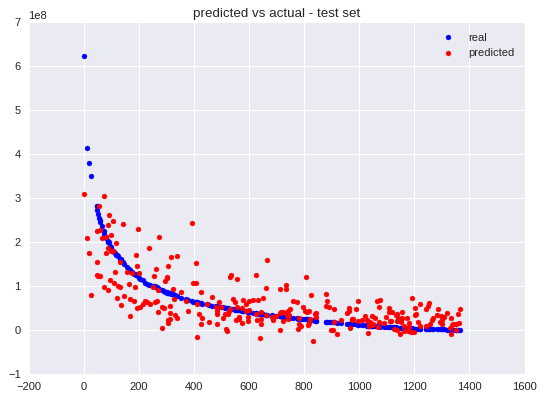

In [66]:
from sklearn import linear_model
lassocv = linear_model.LassoCV(cv=5,random_state=123)
lassocv.fit(X_train_scaled,y_train)
y_pred_lcv = lassocv.predict(X_test_scaled)
getresults(y_pred_lcv)
getr2(y_pred_lcv,lassocv)
showplot(y_pred_lcv)

### Lasso CV Feature Importances


In [81]:
importance = lassocv.coef_
importdf = pd.DataFrame({'col':X.columns, 'importance':importance})
importdf

,col,importance
0,q1,-0.000000e+00
1,q2,1.828543e+05
2,q3,-0.000000e+00
3,q4,-0.000000e+00
4,duration,5.794489e+05
5,avg_vote,0.000000e+00
6,budget,5.194261e+07
7,metascore,1.161429e+07
8,Rating,-8.541129e+05
9,females_allages_avg_vote_x,2.472697e+06


### Decision Trees
R2 Train : 1.0

R2 Test : 0.476

RMSE : 60,934,280

A normal decision tree model performed very poorly with this dataset because the model was extremely overfitted to the training data, while having very high error with the test data.

Mean Absolute Error: 44308812.70695971
Mean Squared Error: 5049658289010700.0
Root Mean Squared Error: 71060947.70695575
R2 score - train: 1.0
R2 score - test: 0.20705895627663973


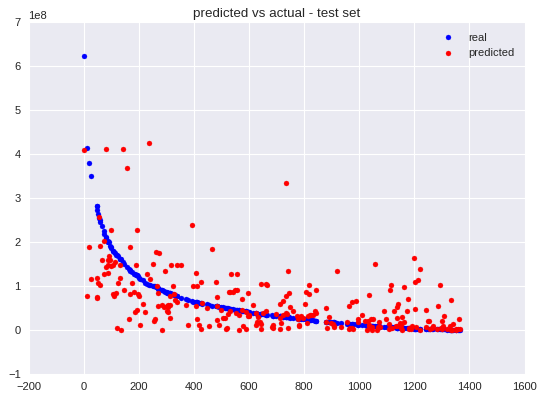

In [67]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=123)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
getresults(y_pred_dt)
getr2(y_pred_dt,dt)
showplot(y_pred_dt)

### Ensemble Models

### Random Forest
R2 Train : 0.951

R2 Test : 0.592

RMSE : 50,958,224

The random forest model also suffered from overfitting with a R2 score on the training set much higher than the test set R2 score. However, it was still doing a decent job of predicting the lifetime_gross values, with a mean absolute error of around $30 million.

Mean Absolute Error: 32813793.234322343
Mean Squared Error: 2596740679469434.5
Root Mean Squared Error: 50958224.84613681
R2 score - train: 0.9513643319682296
R2 score - test: 0.5922373066038097


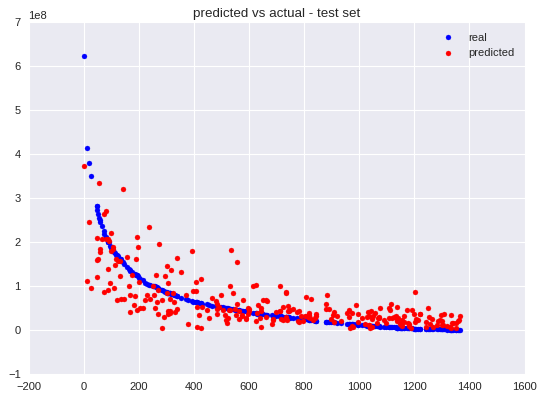

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=123)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
getresults(y_pred_rf)
getr2(y_pred_rf,rf)
showplot(y_pred_rf)

I ran cross validation on the data with the random forest model, and found that the mean absolute error for each fold was $51 million, which was higher than the test mean absolute error, again indicating the issue of overfitting.

In [228]:
from sklearn.model_selection import cross_val_score
sc = StandardScaler()
X_sc = sc.fit_transform(X)
rff = RandomForestRegressor()
rff.fit(X_sc,y)
cvs = cross_val_score(rff, X_sc, y, cv=5, scoring="neg_mean_absolute_error")
print(cvs)
cvs.mean()*-1

[-3.13238457e+07 -2.50712414e+07 -2.31949506e+07 -3.69705146e+07
 -1.41870919e+08]


51686294.15374076

### Tuned Random Forest 
R2 Train : 0.872

R2 Test : 0.592

RMSE : 50,940,345

Tuning the hyperparameters of the random forest did improve the model's performance, and also slightly decreased the overfitting problem.

In [97]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 10, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 5, 7, 8, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [244]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.3min finished


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 1000}

Mean Absolute Error: 32556061.2862234
Mean Squared Error: 2594918834910684.0
Root Mean Squared Error: 50940345.846005835
R2 score - train: 0.8720097182052691
R2 score - test: 0.5925233884024654


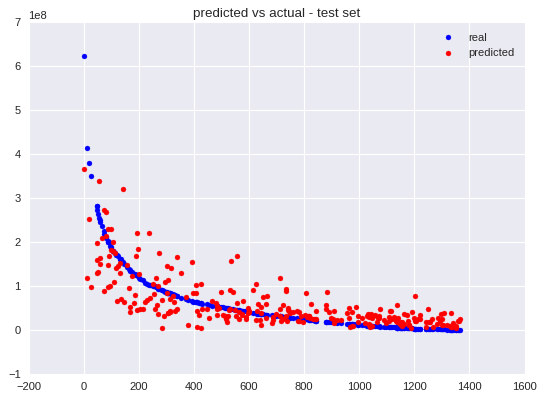

In [103]:
best_random = RandomForestRegressor(bootstrap= True,
 max_depth= None,
 max_features='auto',
 min_samples_leaf= 4,
 min_samples_split= 5,
 n_estimators= 1000)
best_random.fit(X_train_scaled,y_train)
y_pred_bestrandom = best_random.predict(X_test_scaled)
getresults(y_pred_bestrandom)
getr2(y_pred_bestrandom,best_random)
showplot(y_pred_bestrandom)

### Voting Regressor
R2 Train : 0.727

R2 Test : 0.566

RMSE : 52,569,259

The voting regressor model had pretty good results on the train and test data, with less of an issue with overfitting than the random forest model.

Linear Regression : 37132923.224
K Neighbours : 37508171.709
Decision Tree : 39704050.986
Random Forest : 32813793.234
voting regressor:
Mean Absolute Error: 33685704.1154694
Mean Squared Error: 2763527003683339.5
Root Mean Squared Error: 52569259.11293919
R2 score - train: 0.7277087150787926
R2 score - test: 0.5660470746253867


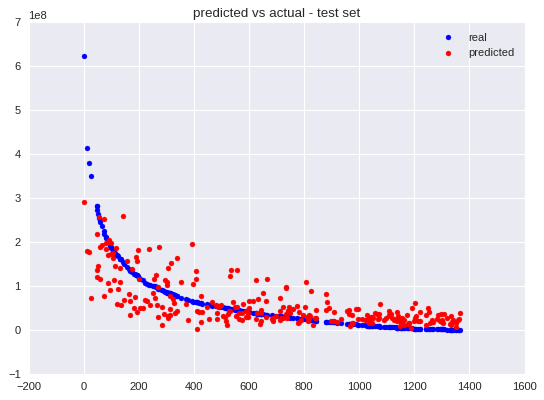

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
# Instantiate lr
lr = LinearRegression()
# Instantiate knn
knr = KNeighborsRegressor(n_neighbors=27)
# Instantiate dt
dt = DecisionTreeRegressor(min_samples_leaf=0.13, random_state=123)
rf = RandomForestRegressor(random_state=123)
# Define the list classifiers
regressors = [('Linear Regression', lr), ('K Neighbours', knr), ('Decision Tree', dt), ('Random Forest', rf)]
# Iterate over the pre-defined list of classifiers
for reg_name, reg in regressors:    
    # Fit clf to the training set
    reg.fit(X_train_scaled, y_train)     
    # Predict y_pred
    y_pred_1 = reg.predict(X_test_scaled)    
    # Calculate score - mean absolute error or r2?
    MAE = metrics.mean_absolute_error(y_test, y_pred_1)  
    # Evaluate clf's score on the test set
    print('{:s} : {:.3f}'.format(reg_name, MAE))
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators=regressors)     
vr.fit(X_train_scaled, y_train)   
y_pred_vr = vr.predict(X_test_scaled)
print('voting regressor:')
getresults(y_pred_vr)
getr2(y_pred_vr,vr)
showplot(y_pred_vr)

### XGBoost Regressor
R2 Train : 0.546

R2 Test : 0.336

RMSE : 65,049,239

XGBoost was not good in terms of any metric, both on the training and test data. It did not do a good job of predicting variation in the target data, resulting in a very flat prediction curve that was consistently under-predicting the gross.

Mean Absolute Error: 38223947.62087912
Mean Squared Error: 4231403511852352.5
Root Mean Squared Error: 65049239.13353908
R2 score - train: 0.5461150951498517
R2 score - test: 0.33554840247215256


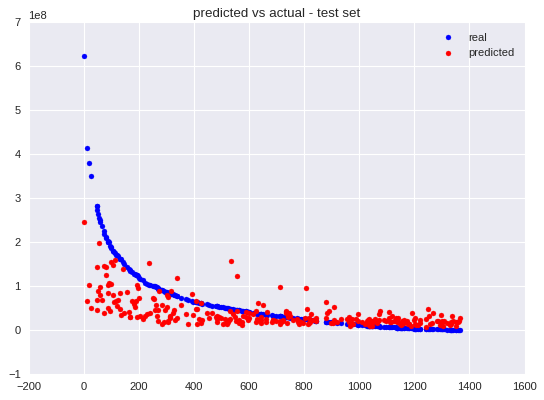

In [70]:
import xgboost as xgb
#data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10,random_state=123)
xg_reg.fit(X_train_scaled,y_train)

preds_xg = xg_reg.predict(X_test_scaled)
getresults(preds_xg)
getr2(preds_xg,xg_reg)
showplot(preds_xg)

### Bagging Regressor - Lasso CV
R2 Train : 0.617

R2 Test : 0.544

RMSE : 54,057,135

Mean Absolute Error: 36316285.42126398
Mean Squared Error: 2922173940932321.0
Root Mean Squared Error: 54057135.89279699
R2 score - train: 0.6180086547829771
R2 score - test: 0.5411349596255484


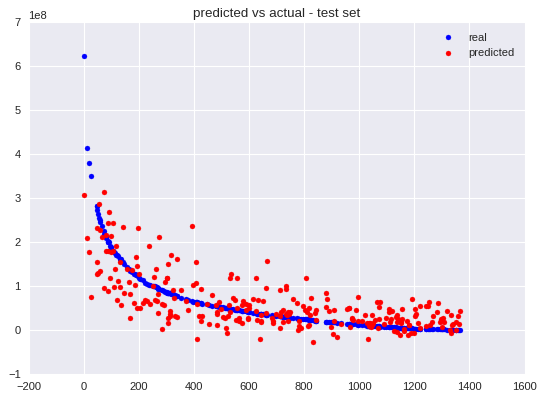

In [71]:
from sklearn.ensemble import BaggingRegressor
from sklearn import linear_model
br = BaggingRegressor(linear_model.LassoCV(random_state=123))
br.fit(X_train_scaled, y_train)
y_pred_br = br.predict(X_test_scaled)
br.score(X_test_scaled,y_test)
getresults(y_pred_br)
getr2(y_pred_br,br)
showplot(y_pred_br)

## Feature Selection - Variance Threshold


I did also try to reduce the number of features via feature selection and extraction methods, but didn't find that they produced better models.

There were five featues identified as having low variance, but after trying models without these features, the results were worse than before, so I decided to keep all of the features. 

### Variance Threshold

In [40]:
normalized_df = X / X.mean()
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.03)
sel.fit(normalized_df)
mask = sel.get_support()
X_reduced_var = X.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(X.shape[1], X_reduced_var.shape[1]))

Dimensionality reduced from 34 to 29.


#### Trying RF with X_reduced_var
random forest R2 train: 0.947

random forest R2 Test: 0.580

With five less features, the model performed a little worse on the test data than it did with all of the features.

In [45]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced_var,y,test_size=0.2,random_state=123)
rf2 = RandomForestRegressor(random_state=123)
rf2.fit(X_train_red,y_train_red)
y_pred_rf2 = rf2.predict(X_test_red)
print('train r2 score:',r2_score(y_train_red,rf2.predict(X_train_red)))
print('test r2 score:',r2_score(y_test_red,y_pred_rf2))
print('test rmse:',np.sqrt(mean_squared_error(y_test_red, y_pred_rf2)))

train r2 score: 0.9470999400415784
test r2 score: 0.5797670347272907
test rmse: 55809298.14758166


#### Voting Regressor with X_reduced_var
R2 Train: 0.683
R2 Test: 0.567
RMSE: 56,663,820 
This model performed similarly with regards to the R2 values compared to the model without the reduced features, but it had a higher RMSE of 56,663,820 compared to the original 52,569,259. Since RMSE is an important metric that I want to keep as low as possible, I decided to stick with the original, non-reduced set of features.

In [46]:
lr2 = LinearRegression()
knr2 = KNeighborsRegressor(n_neighbors=27)
dt2 = DecisionTreeRegressor(min_samples_leaf=0.13, random_state=123)
rf2 = RandomForestRegressor(random_state=123)
regressors = [('Linear Regression', lr2), ('K Neighbours', knr2), ('Decision Tree', dt2), ('Random Forest', rf2)]
for reg_name, reg in regressors:    
    reg.fit(X_train_red, y_train_red)
    y_pred_2 = reg.predict(X_test_red)    
    MAE = metrics.mean_absolute_error(y_test_red, y_pred_2)  
    print('{:s} : {:.3f}'.format(reg_name, MAE))
vr2 = VotingRegressor(estimators=regressors)     
vr2.fit(X_train_red, y_train_red)   
y_pred_vr2 = vr2.predict(X_test_red)
print('voting regressor:')
print('train r2 score:',r2_score(y_train_red,vr2.predict(X_train_red)))
print('test r2 score:',r2_score(y_test_red,y_pred_vr2))
print('test rmse:',np.sqrt(mean_squared_error(y_test_red, y_pred_vr2)))

Linear Regression : 34530856.631
K Neighbours : 39323024.168
Decision Tree : 40098946.750
Random Forest : 33345304.443
voting regressor:
train r2 score: 0.6825518127420335
test r2 score: 0.5667997466470502
test rmse: 56663820.49704619


## PCA Feature Extraction
After performing PCA feature extraction, I found that almost all of the features were needed to explain most of the variance. After testing several algorithms with the transformed X dataset and testing them with many different numbers of features the results were much worse than results without PCA feature extraction.


In [48]:
from sklearn.preprocessing import StandardScaler
# Create the scaler and standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.decomposition import PCA
# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(X_scaled)
# This changes the numpy array output back to a dataframe
pd.DataFrame(pc).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,-3.212450,3.965160,-1.469844,0.836341,1.380163,1.029419,0.258457,-0.859824,-1.539886,0.568553,-0.728850,-1.972129,-0.538746,-0.196594,1.346481,0.257043,-0.062494,-0.348314,-0.060251,0.184628,0.752407,0.775550,0.375995,0.700502,-1.078460,0.243536,-0.507490,-0.477142,-1.072808,-0.202931,-0.254072,0.224926,-0.038422,-1.637685e-14
1,-6.259444,9.320294,-3.969752,-2.044405,-0.510456,2.589615,-3.814288,2.300970,0.266526,1.126170,2.160862,-2.126506,3.149857,-2.089844,-1.165837,-0.319672,1.345807,-0.703332,-0.266357,1.432804,0.312953,-0.356701,-0.697815,-0.496809,4.942242,-2.496927,0.231562,0.838427,-1.430687,0.448954,0.422549,0.264745,0.048097,-1.509563e-14


[1.55835238e-01 9.25361060e-02 7.11786062e-02 6.02345315e-02
 5.31174463e-02 4.88394512e-02 4.19780852e-02 3.97601656e-02
 3.93112944e-02 3.65513733e-02 3.26790598e-02 3.13517134e-02
 3.02747463e-02 3.00361162e-02 2.57106617e-02 2.38123549e-02
 2.27379432e-02 2.18940676e-02 1.92917538e-02 1.79077485e-02
 1.54365709e-02 1.50910682e-02 1.50127289e-02 1.38694843e-02
 1.07299153e-02 1.04798469e-02 8.02095376e-03 6.69021711e-03
 6.30863648e-03 1.64514992e-03 1.16515993e-03 4.25417374e-04
 8.63883145e-05 1.99799864e-32]
[0.15583524 0.24837134 0.31954995 0.37978448 0.43290193 0.48174138
 0.52371946 0.56347963 0.60279092 0.6393423  0.67202136 0.70337307
 0.73364782 0.76368393 0.78939459 0.81320695 0.83594489 0.85783896
 0.87713071 0.89503846 0.91047503 0.9255661  0.94057883 0.95444831
 0.96517823 0.97565808 0.98367903 0.99036925 0.99667788 0.99832303
 0.99948819 0.99991361 1.         1.        ]


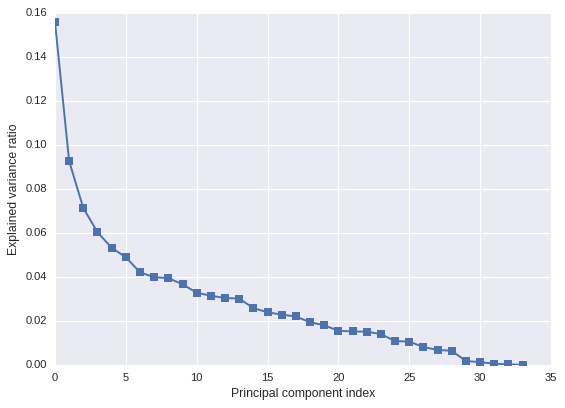

In [49]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_, marker='s')

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()



##### PCA with Random Forest

In [50]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(pc[:,:29], y, test_size=0.2, random_state=123)

rf_pc= RandomForestRegressor()
rf_pc.fit(X_train0, y_train0)
y_pred_rf_pc = rf_pc.predict(X_test0)
print(r2_score(y_train0,rf_pc.predict(X_train0)))
print(r2_score(y_test0,y_pred_rf_pc))
print('test rmse:',np.sqrt(mean_squared_error(y_test0, y_pred_rf_pc)))

0.94059349296252
0.5497180264548033
test rmse: 57770188.21636192


#### PCA with LassoCV

In [51]:
lcv2 = linear_model.LassoCV(cv=5,random_state=123)
lcv2.fit(X_train0,y_train0)
y_pred_lcv2 = lcv2.predict(X_test0)
print('r2 score test:',r2_score(y_test0,y_pred_lcv2))
print('test rmse:',np.sqrt(mean_squared_error(y_test0, y_pred_lcv2)))

r2 score test: 0.5824701963796086
test rmse: 55629511.03432488


#### PCA with Voting Regressor

In [53]:
lr = LinearRegression()
# Instantiate knn
knr = KNeighborsRegressor(n_neighbors=27)
# Instantiate dt
dt = DecisionTreeRegressor(min_samples_leaf=0.13, random_state=123)
rf = RandomForestRegressor(random_state=123)
# Define the list classifiers
regressors = [('Linear Regression', lr), ('K Neighbours', knr), ('Decision Tree', dt), ('Random Forest', rf)]
# Iterate over the pre-defined list of classifiers
for reg_name, reg in regressors:    
    # Fit clf to the training set
    reg.fit(X_train0, y_train0)     
    # Predict y_pred
    y_pred_1 = reg.predict(X_test0)    
    # Calculate score - mean absolute error or r2?
    MAE = metrics.mean_absolute_error(y_test0, y_pred_1)  
    # Evaluate clf's score on the test set
    print('{:s} : {:.3f}'.format(reg_name, MAE))
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingRegressor
vr3 = VotingRegressor(estimators=regressors)     
vr3.fit(X_train0, y_train0)   
y_pred_vr3 = vr3.predict(X_test0)
print('voting regressor:')
print('r2 score:',r2_score(y_test0,y_pred_vr3))
print('test rmse:',np.sqrt(mean_squared_error(y_test0, y_pred_vr3)))

Linear Regression : 34588437.434
K Neighbours : 37471358.204
Decision Tree : 45760821.344
Random Forest : 35681492.014
voting regressor:
r2 score: 0.5503675051581396
test rmse: 57728509.83633162


The results for the Voting Regressor were pretty similar in terms of R2 value with PCA and with the original set of features, but it did get worse in terms of the RMSE, which I want to keep as low as possible. Since I also still ended up having to use a large number of features (29 compared to the original 34), the tradeoff of greater error didn't seem worth it considering the number of features was only reduced a small amount.



---



# 5. Analysis and Practical Considerations

Which of these models is the most successful? It depends on the metrics you consider important. I wanted the model that had a relatively high R2 value and a low RMSE value for the test set. The tuned Random Forest model had the "best" results by this metric. However, that model was also severely overfitting the data, shown in how the R2 score was significantly higher for the train data than the test data. The overfitted model was especially concerning because the dataset I started with was small with only 1400 rows, so it is likely that this data may not be truly representative of the movie industry as a whole, meaning that the model won't be generalizable. 


For that reason, the model I chose as being the best overall was the Voting Regressor model, which is an ensemble model based on several different algorithms, including random forest. Though its results were not as "good" as the random forest's, it was less overfitted and did seem to be able to predict the general trends reasonably well. This model's results are show below:

### Voting Regressor Results

Mean Absolute Error: 33685704.1154694
Mean Squared Error: 2763527003683339.5
Root Mean Squared Error: 52569259.11293919
R2 score - train: 0.7277087150787926
R2 score - test: 0.5660470746253867


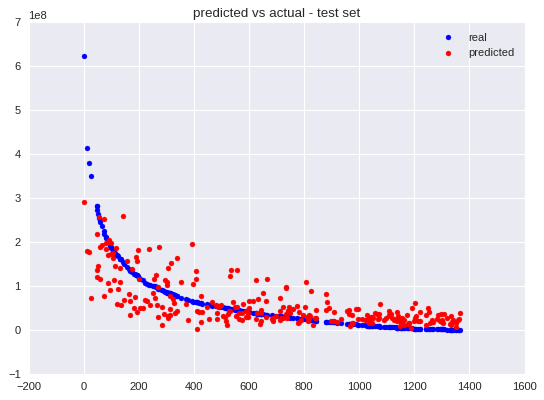

In [72]:
getresults(y_pred_vr)
getr2(y_pred_vr,vr)
showplot(y_pred_vr)

#### Permutation Feature Importance

In [0]:
pip install eli5

In [86]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, random_state=123).fit(X_test_scaled, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.7288 ± 0.1495,budget
0.0463 ± 0.0214,perc_10_x
0.0297 ± 0.0258,females_allages_avg_vote_x
0.0294 ± 0.0203,num_actor_tc_noms
0.0291 ± 0.0146,perc_1_x
0.0174 ± 0.0136,perc_5_x
0.0138 ± 0.0428,metascore
0.0116 ± 0.0068,males_allages_avg_vote_x
0.0104 ± 0.0063,Horror
0.0073 ± 0.0050,Comedy


Looking at the Random Forest's importance data shows:

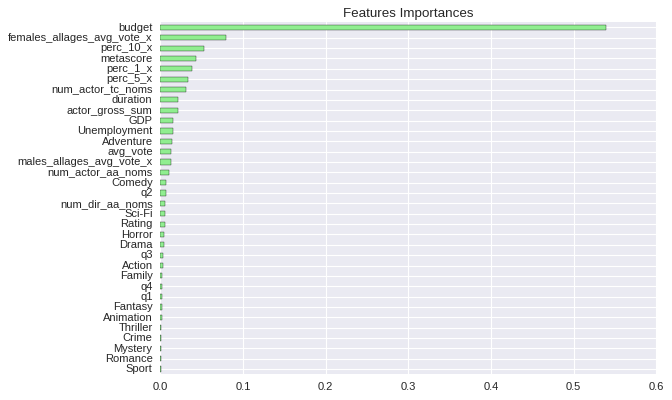

In [91]:
# Create a pd.Series of features importances
plt.style.use('seaborn')
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)
# Sort importances
importances_sorted = importances.sort_values()
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

Overwhelmingly the most important feature is the budget. This is not surprising, as it is certainly true that there is a huge difference between the expected/actual grosses of high budget and low budget films.

This is likely due to the very large range of budgets and grosses. The truly high-budget films (\$100+ million) pretty much always make exponentially more than the lowest-budget films (\$100,000) simply due to the nature of film distribution and advertising. The big budget films also receive hefty marketing budgets and have famous actors, as well as being released in more theaters and showing for a longer amount of time. Small, indie films have none of these advantages, so it is easily predictable that those films will not make nearly as much money. This study has shown that the budget is so important to the film's eventual gross that it would be almost impossible for a micro-budget movie to have a comparable level of success to one of the big-budget films, *no matter how good the film is, who it stars, or any other factor.*

Interestingly, of all the features related to rating/quality of the film, the most important were the percentage of 10-star votes on IMDb, and the female average votes. However, the male average votes were not nearly as important. Of the genres, Adventure was the one that influenced the model the most, while most of the others had little-to-no importance. Having a high percentage of 10-star reviews seems to be indicative of a strong core fanbase, which may spread good word-of-mouth, encouraging others to see the movie. As a result, these dedicated fans are more important to a movie's success than the movie's overall score, avg_vote, which is only the 13th most important feature. This shows us that rather trying to have a broadly-appealing film, it may be best to create a film that resonates deeply with at least one group because that one group may be more valuable than the larger, uncommited, uninvensted general audiences.

As to why the females' score is so much more important than the males' score, I expect that this is simply due to the limitations of the small dataset and may not be representative of a general dataset. In 2018, women represented 51% of the moviegoing audience ([source](https://womenandhollywood.com/mpaa-report-2018-women-represent-51-of-moviegoers-47-of-ticket-buyers/)), which is not enough of a majority to suggest that their opinions of movies significantly affect that movie's financial performance.

In [96]:
data.loc[:,['males_allages_avg_vote_x', 'females_allages_avg_vote_x','avg_vote']].mean()

males_allages_avg_vote_x      6.389796
females_allages_avg_vote_x    6.627405
avg_vote                      6.462117
dtype: float64

It was also interesting that the number of actors' Teen Choice Awards nominations was much more important than the number of actors' Academy Awards nominations. While the Academy Awards might be the most prestigious film award, it is not the best indicator of financial success. It also may indicate that the academy awards are not rewarding the films that audiences want to watch, and that there is a disconnect between popular film and "prestige" film. Film studios can consider this when casting a for a movie, because while an actor's salary and perceived "worth" may increase with the number of Academy Awards they have won, this is not correlated with the final gross of the movie. In fact, actors with the less-prestigious Teen Choice Awards nominations actually contribute more to a film's financial success.

# 6. Conclusion

There are so many decisions that must be made in the movie-making process. From who to cast, who to direct, what the film is about, the budget you're willing to spend, and the date it is released, is is impossible to make a truly risk-free movie. There is no perfect formula that can perfectly predict a film's proceeds. But, this analysis has shown that there are certain metrics that film studios should consider more heavily than others. It also reveals that given certain inputs, we can often predict how well a movie will perform within a relatively small margin of error of around $50 million. An actor's worth can be measured in terms of the results of their past movies, which did end up being an important feature, and in terms of their awards for which they have been nominated and won. Some measures of quality of films are more important than others as well.

Future analysis should include more records going back further in time and without dropping null values when possible. I would also like to gather more data from different sites, such as including Rotten Tomatoes Critic and Audience "Tomatometer" scores. Other information that would be helpful to study includes the demographics of the cast and crew, or information about the plot beyond just the genre. The possibilities are endless, but time for this project was unfortunately limited. Also, I would have liked to incorporate my own webscraping program earlier on in the data collection if I were to change the methods, as I believe this would have resulted in more accurate information as it is coming from only one source, rather than several, unrelated sources. 

In the end, it is important to remember that box office success is not the only measure of a movie's success. Success is all relative to a person's point of view. A director may see success in the forms of award nominations, while a studio may care more about the bottom line. But even this is not generalizable; some directors care more about financial gain and some studios are focused more on critical recognition. So in studies like this, we shoud remember that "success" is not defined by just a number. That being said, the film industry also can't ignore the bottom line either. So in the end, we must take a holistic look at why a film is made and what is the goal of its existence: entertainment, education, change, or even purely financial gain. All of these considerations play a role in the multifaceted industry of movies and entertainment. 

---

### Bibliography



### Data Sources
Domestic Box Office, Box Office Mojo, retrieved April 2020. https://www.boxofficemojo.com/year/2018/?grossesOption=totalGrosses

Stefano Leone, IMDb Extensive Dataset (2020). https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset

Ayush Kalla, Rotten Tomatoes Movie Dataset (2019). https://www.kaggle.com/ayushkalla1/rotten-tomatoes-movie-database

ABab, Film Awards Dataset (2020) https://www.kaggle.com/iwooloowi/film-awards-imdb

US GDP by Year, retreived April 2020. https://www.thebalance.com/us-gdp-by-year-3305543

Unemployment Rate by Year, retreived April 2020. https://www.thebalance.com/unemployment-rate-by-year-3305506

Internet Movie Database (IMDb) https://www.imdb.com/?ref_=nv_home

---
### Code Resources
Eryk Lewinson (Feb 11, 2019), Explaining Feature Importance, from Towards Data Science https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

Nagesh Singh Chauhan (Feb 25, 2019), Linear Regression in Python, from Towards Data Science https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

Drazen Zaric (April 15, 2019), Correlation Matrix Tutorial https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

Metrics and Scoring sklearn documentation, retrieved April 2020 https://scikit-learn.org/stable/modules/model_evaluation.html

Beautiful Soup Documentation, retreived April 2020 https://www.crummy.com/software/BeautifulSoup/bs4/doc/
